# Comparing the Effectiveness and Safety of Hydrocellular and Hydrocolloid Dressings

In [1]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Make Plotly work in Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

#### Files names
coste_paciente, per revista.xlsx datos_analisis2 - english.xlsx

In [3]:
# path to the datasets folder with respect to notebook.
path = "../dataset/" 
cost_path = path + "coste_paciente, per revista.xlsx" 
analysis_path = path + "datos_analisis2 - english.xlsx" 

## Cost Dataset

In [4]:
# read data from the excel file 
cost_df = pd.read_excel(cost_path)
cost_df.head()

,ID CODE,Nurse costs,Dressing costs,Material costs,Secondary costs,Total costs,Dressing type
0,10001,29.250,73.8,8.576,0.0,111.626,Hydrocolloid
1,30001,38.775,73.8,9.664,0.0,122.239,Hydrocolloid
2,30003,15.000,69.7,3.535,0.0,88.235,Hydrocolloid
3,30005,46.250,NaN,8.140,0.0,54.390,Hydrocolloid
4,30006,18.750,57.4,1.682,0.0,77.832,Hydrocolloid


In [5]:
# checkout NA values 
cost_df.isnull().sum()  

ID CODE             0
Nurse costs         0
Dressing costs     12
Material costs      0
Secondary costs     0
Total costs         0
Dressing type       0
dtype: int64

In [6]:
#det the stats for the Dressing costs coloumn since it's the only coloumn with NA values
cost_df['Dressing costs'].describe()

count    157.000000
mean      59.128854
std       32.224129
min        4.100000
25%       45.100000
50%       59.520000
75%       71.910000
max      191.080000
Name: Dressing costs, dtype: float64

In [7]:
# Replace NA values with the mean of Dressing cost values.
cost_df['Dressing costs'].fillna(cost_df['Dressing costs'].mean(), inplace=True) 

In [8]:
# Add updated total cost columns to data frame after filling up the null values
cost_df['updated total cost'] = cost_df['Nurse costs'] + cost_df['Dressing costs'] + cost_df['Material costs'] + cost_df['Secondary costs']

In [9]:
# Sanity check after adding new column
cost_df.tail(10)

,ID CODE,Nurse costs,Dressing costs,Material costs,Secondary costs,Total costs,Dressing type,updated total cost
159,480007,23.750000,74.400000,14.40600,0.000,112.556000,Hydrocellular,112.556000
160,480008,22.250000,66.960000,10.46272,0.035,99.707720,Hydrocellular,99.707720
161,480011,24.266667,66.960000,7.88400,0.000,99.110667,Hydrocellular,99.110667
162,480012,18.750000,67.680000,4.63000,0.000,91.060000,Hydrocellular,91.060000
163,480014,31.250000,80.370000,9.81600,0.035,121.471000,Hydrocellular,121.471000
164,480016,12.500000,71.910000,6.75600,0.000,91.166000,Hydrocellular,91.166000
165,480018,27.500000,59.128854,8.99272,0.210,36.702720,Hydrocellular,95.831574
166,500001,7.500000,59.128854,1.90800,0.000,9.408000,Hydrocellular,68.536854
167,500002,17.500000,59.128854,4.44400,33.040,54.984000,Hydrocellular,114.112854
168,570002,8.000000,63.240000,3.43400,0.000,74.674000,Hydrocellular,74.674000


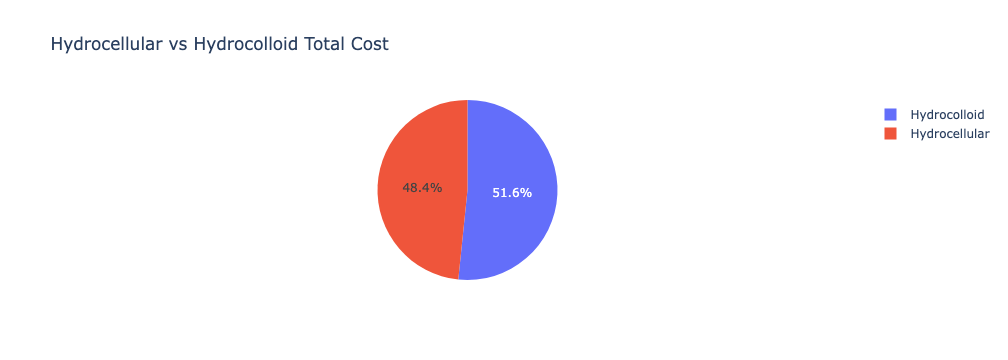

In [10]:
# Pie chart of the total cost for Hydrocellular and Hydrocolloid
px.pie(cost_df, values='updated total cost', names='Dressing type', title="Hydrocellular vs Hydrocolloid Total Cost")

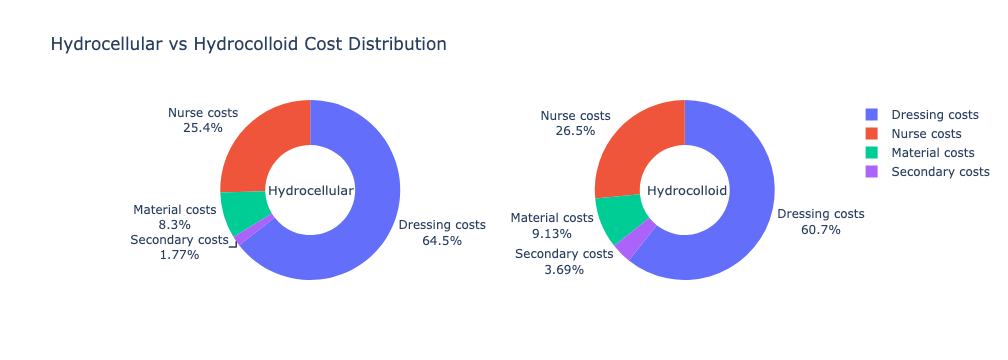

In [11]:
# Detailed Pie chart of the different costs for Hydrocellular and Hydrocolloid

labels=['Nurse costs','Dressing costs', 'Material costs', 'Secondary costs']                                                          

nc_ar = cost_df.loc[cost_df['Dressing type'] == 'Hydrocellular']['Nurse costs'].sum() 
dc_ar = cost_df.loc[cost_df['Dressing type'] == 'Hydrocellular']['Dressing costs'].sum() 
mc_ar = cost_df.loc[cost_df['Dressing type'] == 'Hydrocellular']['Material costs'].sum()
sc_ar = cost_df.loc[cost_df['Dressing type'] == 'Hydrocellular']['Secondary costs'].sum()

nc_id = cost_df.loc[cost_df['Dressing type'] == 'Hydrocolloid']['Nurse costs'].sum() 
dc_id = cost_df.loc[cost_df['Dressing type'] == 'Hydrocolloid']['Dressing costs'].sum() 
mc_id = cost_df.loc[cost_df['Dressing type'] == 'Hydrocolloid']['Material costs'].sum() 
sc_id = cost_df.loc[cost_df['Dressing type'] == 'Hydrocolloid']['Secondary costs'].sum() 


values_ar = [nc_ar, dc_ar, mc_ar, sc_ar]
values_id = [nc_id, dc_id, mc_id, sc_id]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values_ar, textinfo='label+percent',
                             insidetextorientation='radial'
                            , name= "Hydrocellular"), 1, 1)

fig.add_trace(go.Pie(labels=labels, values=values_id, textinfo='label+percent',
                             insidetextorientation='radial'
                            , name= "Hydrocolloid"), 1, 2)

fig.update_traces(hole=.5, hoverinfo="label+percent+name")


fig.update_layout(title_text="Hydrocellular vs Hydrocolloid Cost Distribution", annotations=[dict(text='Hydrocellular', x=0.16, y=0.5, font_size=13, showarrow=False),
                 dict(text='Hydrocolloid', x=0.84, y=0.5, font_size=13, showarrow=False)])


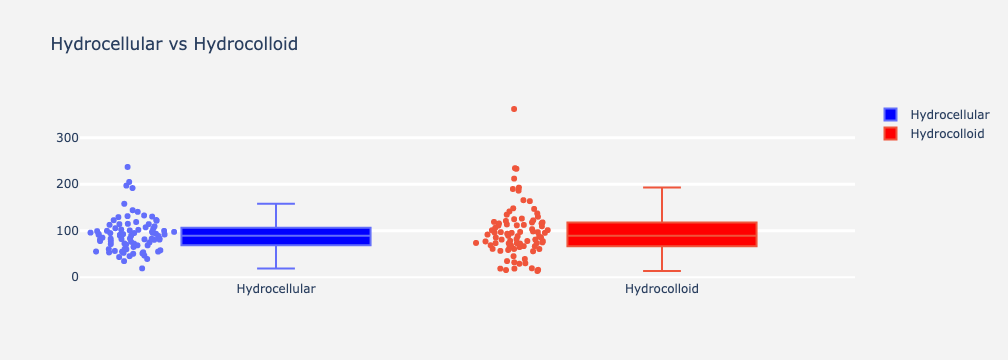

In [12]:
# Get intution of the cost distribution 
fig = go.Figure()
fig.add_trace(go.Box(y= cost_df.loc[cost_df['Dressing type'] == 'Hydrocellular']['updated total cost'] 
, boxpoints='all', name='Hydrocellular',fillcolor='blue', jitter=0.5, whiskerwidth=0.2))

fig.add_trace(go.Box(y= cost_df.loc[cost_df['Dressing type'] == 'Hydrocolloid']['updated total cost'], boxpoints='all', name='Hydrocolloid',
                    fillcolor='red', jitter=0.5, whiskerwidth=0.2))
fig.update_layout(title='Hydrocellular vs Hydrocolloid', 
                  yaxis=dict(gridcolor='rgb(255, 255, 255)',
                 gridwidth=3),
                 paper_bgcolor='rgb(243, 243, 243)',
                 plot_bgcolor='rgb(243, 243, 243)')

## Analysis dataset

In [13]:
# read data from the excel file 
analysis_df = pd.read_excel(analysis_path)
analysis_df.head()

,ID code,Sex,Age,Baseline visit,num. visit,Dressing type,Ulcer_stage,"Cured: 1, no cured: 2",infected,Postural changes,red_friccion,Avoided_infecion,Braden Scale,Push Scale,porc_postural changes,porc_friccion,porc_infec,Loss to follow up,Location
0,270009,Female,86,2015-09-11,2.0,Hydrocellular,1,2,2,0,0,0,Riesgo moderado,15,NaN,NaN,NaN,2,Trochanter
1,470003,Female,92,2014-09-19,2.0,Hydrocellular,2,2,2,0,0,0,Riesgo moderado,4,NaN,NaN,NaN,1,Trochanter
2,30006,Female,88,2014-06-03,2.0,Hydrocolloid,2,2,1,0,0,0,Riesgo moderado,6,NaN,NaN,NaN,2,Trochanter
3,100005,Female,91,2014-03-11,3.0,Hydrocolloid,1,2,2,1,1,1,Riesgo moderado,12,1.0,1.0,1.0,2,Trochanter
4,100011,Female,86,2015-09-28,4.0,Hydrocolloid,1,2,2,2,2,0,Sin riesgo,6,1.0,1.0,0.0,2,Trochanter


In [14]:
# Checkout NA values
analysis_df.isnull().sum()

ID code                   0
Sex                       0
Age                       0
Baseline visit            0
num. visit                1
Dressing type             0
Ulcer_stage               0
Cured: 1, no cured: 2     0
infected                  0
Postural changes          0
red_friccion              0
Avoided_infecion          0
Braden Scale              0
Push Scale                0
porc_postural changes    44
porc_friccion            44
porc_infec               44
Loss to follow up         0
Location                  0
dtype: int64

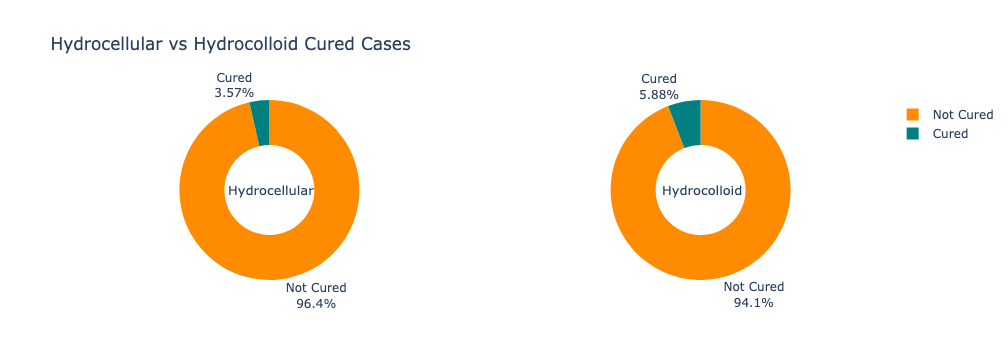

In [15]:
# Pie chart of the Cured and Not Cured cases for Hydrocellular and Hydrocolloid

labels=['Cured','Not Cured']                                                          

c_ar = analysis_df.loc[(analysis_df['Dressing type'] == 'Hydrocellular') & (analysis_df['Cured: 1, no cured: 2'] == 1)]['Cured: 1, no cured: 2'].count() 
n_ar = analysis_df.loc[(analysis_df['Dressing type'] == 'Hydrocellular') & (analysis_df['Cured: 1, no cured: 2'] == 2)]['Cured: 1, no cured: 2'].count()


c_id  = analysis_df.loc[(analysis_df['Dressing type'] == 'Hydrocolloid') & (analysis_df['Cured: 1, no cured: 2'] == 1)]['Cured: 1, no cured: 2'].count() 
n_id  = analysis_df.loc[(analysis_df['Dressing type'] == 'Hydrocolloid') & (analysis_df['Cured: 1, no cured: 2'] == 2)]['Cured: 1, no cured: 2'].count()



values_ar = [c_ar, n_ar]
values_id = [c_id, n_id]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values_ar, textinfo='label+percent',
                             insidetextorientation='radial'
                            , name= "Hydrocellular"), 1, 1)

fig.add_trace(go.Pie(labels=labels, values=values_id, textinfo='label+percent',
                             insidetextorientation='radial'
                            , name= "Hydrocolloid"), 1, 2)

colors = ['teal', 'darkorange']


fig.update_traces(hole=.5, marker=dict(colors=colors))



fig.update_layout(title_text='Hydrocellular vs Hydrocolloid Cured Cases', 
                  annotations=[
                      dict(text='Hydrocellular', x=0.17, y=0.5, font_size=13, showarrow=False),
                      dict(text='Hydrocolloid', x=0.83, y=0.5, font_size=13, showarrow=False)])

In [16]:
# Sanity check
analysis_df.loc[analysis_df['Cured: 1, no cured: 2'] == 1]

,ID code,Sex,Age,Baseline visit,num. visit,Dressing type,Ulcer_stage,"Cured: 1, no cured: 2",infected,Postural changes,red_friccion,Avoided_infecion,Braden Scale,Push Scale,porc_postural changes,porc_friccion,porc_infec,Loss to follow up,Location
14,460005,Male,59,2014-10-14,8.0,Hydrocolloid,2,1,2,6,6,6,Riesgo alto,4,1.0,1.000000,1.000000,2,Trochanter
25,50016,Female,99,2015-08-12,8.0,Hydrocolloid,2,1,2,6,6,6,Riesgo bajo,4,1.0,1.000000,1.000000,2,Heel
62,140002,Female,91,2014-09-15,8.0,Hydrocolloid,2,1,2,6,6,6,Riesgo alto,5,1.0,1.000000,1.000000,2,Sacrum
63,160002,Female,86,2014-04-08,8.0,Hydrocolloid,2,1,2,6,6,6,Riesgo alto,12,1.0,1.000000,1.000000,2,Sacrum
66,250004,Female,80,2014-11-03,8.0,Hydrocolloid,2,1,2,6,6,6,Riesgo alto,12,1.0,1.000000,1.000000,2,Sacrum
115,120003,Male,82,2014-07-02,8.0,Hydrocellular,2,1,2,6,6,6,Riesgo alto,5,1.0,1.000000,1.000000,2,Other
122,320002,Female,91,2014-10-09,8.0,Hydrocellular,2,1,2,0,5,5,Sin riesgo,11,0.0,0.833333,0.833333,2,Malleolus
137,360002,Female,77,2014-09-24,8.0,Hydrocellular,2,1,2,6,6,6,Riesgo moderado,15,1.0,1.000000,1.000000,2,Gluteus


In [17]:
# Sanity check
analysis_df.loc[analysis_df['Cured: 1, no cured: 2'] == 1]['infected']

14     2
25     2
62     2
63     2
66     2
115    2
122    2
137    2
Name: infected, dtype: int64

In [18]:
# Sanity check
analysis_df.loc[analysis_df['Cured: 1, no cured: 2'] == 1]['Push Scale']

14      4
25      4
62      5
63     12
66     12
115     5
122    11
137    15
Name: Push Scale, dtype: int64

In [19]:
# Sanity check
analysis_df['Push Scale'].unique()

array([15,  4,  6, 12,  5, 16, 11, 13,  9,  8,  7, 14, 10,  3,  1,  2])

In [20]:
analysis_df['Location'].unique()

array(['Trochanter', 'Heel', 'Sacrum', 'Other', 'Malleolus', 'Gluteus'],
      dtype=object)

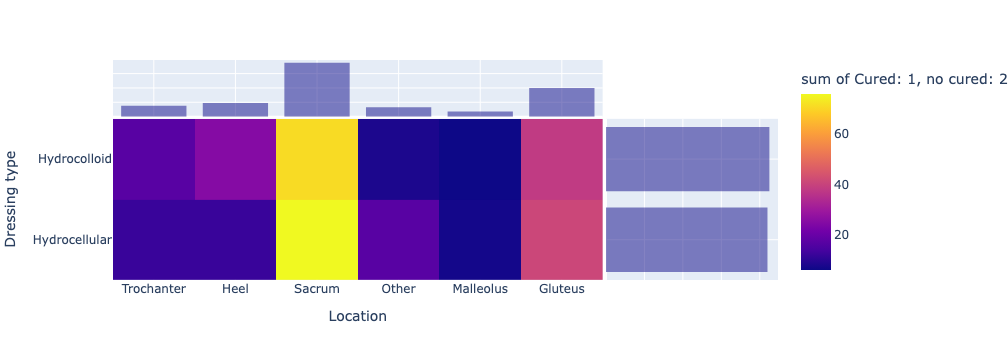

In [21]:
# Heatmap of the location, derssing type and status
px.density_heatmap(analysis_df, x='Location', y='Dressing type', z='Cured: 1, no cured: 2', marginal_x="histogram", marginal_y="histogram")

# Interpretation

Both types of dressings can be effective in promoting wound healing, but the choice of dressing will depend on the type and severity of the wound and its location, as well as other factors such as the patient's overall health and medical history. It is important to consult with a healthcare professional to determine the most appropriate type of dressing for a particular wound, which can be a good start to making an application depending on a machine learning model to identify the best option based on the given data.

# Machine Learning Perspective

We have a relatively small amount of data 169 cases having more data would be ideal, alongside the limitation of using these three attributes (porc_postural changes, porc_friccion, porc_infec) hence they have 44 missing values which are more than 25% of the whole data, so they will have a negative effect on the model quality.

After Cleaning and combining the two data frames we can formulate different questions (problems) that can be solved using machine learning such as predicting **patient status** in a period of time,  **Cost Estimation** and **Dressing Type**.

### 1.Patient Status
If we are to create a classification model based on our data, we could predict whether the patient will be cured in 8 weeks.
which gives the patients and doctors a kick start to plan the course of treatment and what to do to get the most out of it.


### 2. Cost Estimation
Cost is a crucial factor in any treatment.
By creating a Regression model we can estimate the total cost of treatment

### 3. Dressing Type
Another problem can be solved by machine learning classification algorithms, a machine learning model can predict which dressing is better to be used based on the pressure ulcer's location alongside the other features.

#### An idea from a business perspective is creating a mobile application that can take a picture of ulcers and suggest the dressing, cost and if it needs doctor intervention and if so it can show the steps of applying the dressing